## Linear Regression using pytorch ( part 2 )

This builds on Linear Regression part 1 

Is *Linear* Regression only for straight lines? At first glance the coefficient equation 
&#375; = &theta;<sub>0</sub> + &theta;<sub>1</sub>X<sub>1</sub> + &theta; <sub>2</sub>X<sub>2</sub> + ... + &theta;<sub>n</sub>X<sub>n</sub> produces straight lines (in multiple dimensions).

How can we extend the linear regression to produce curves?

What we need to do is to amend (or append) the input value X. To produce a curve we need a higher order function, such as a quadratic ax<sup>2</sup> + bx + c. 

Taking our X inputs we can square the inputs and run the same linear regression . This time we solve for: &#375; = &theta;<sub>0</sub> + &theta;<sub>1</sub>X<sup>2</sup><sub>1</sub> + &theta; <sub>2</sub>X<sup>2</sup><sub>2</sub> + ... + &theta;<sub>n</sub>X<sup>2</sup><sub>n</sub>

That's one example we can append the squared values to the original X.

In fact we can apply any non-linear function (applying a linear one is kind of pointless {why?})
log, cos, cube, etc.

In [1]:
import math
import torch
import matplotlib.pyplot as plt

First let's create a noisy curve, we'll make a semicircle. X is a 1D vector.

In [2]:
noisiness = 20
num_points = 50

a = torch.linspace( 0, 1*math.pi, steps=num_points ).unsqueeze(1)

x = 7 * torch.cos( a ) + ( ( torch.rand( num_points, 1 ) - 0.5 ) * noisiness/100.0 )
y = torch.sin( a ) + ( ( torch.rand( num_points, 1 ) - 0.5 ) * noisiness/100.0 )

Show the input data

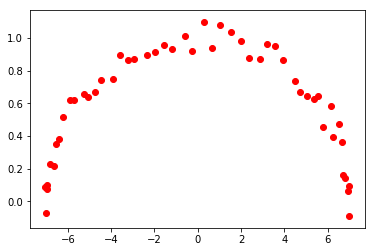

In [3]:
plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.show()

Now, we run the standard linear regression, to find a straight line fit

In [4]:
xplusone = torch.cat( ( torch.ones( x.size(0),1 ), x) , 1 ) 
R, _ = torch.gels( y, xplusone )
R = R[0:xplusone.size(1)]  

yh = xplusone.mm( R ) 

We plot the data

Not surprisingly, a straight line does not accurately describe the data at all

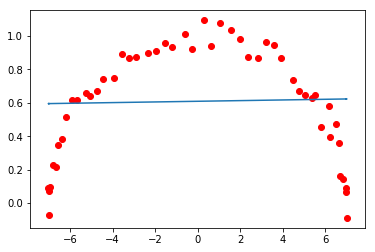

In [5]:
yh = xplusone.mm( R ) 
plt.plot( x.tolist(), yh.tolist() )
plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.show()

Change the inputs to be squared
Rerun the regression, the same old code

In [6]:
x2 = x*x

x2plusone = torch.cat( ( torch.ones( x2.size(0),1 ), x2) , 1 ) 
R2, _ = torch.gels( y, x2plusone )
R2 = R2[0:x2plusone.size(1)]  

Plot the curve

We have to multiply the coefficients by the squared inputs, that's what we solved for.

Much better fit

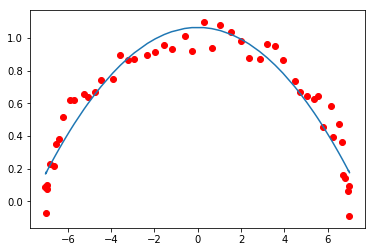

In [7]:
yh2 = x2plusone.mm( R2 ) 
plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.plot( x.tolist(), yh2.tolist() )
plt.show()

Things to try. 

Using the car example from part 1:

* X<sub>1</sub> Top speed in mph.
* X<sub>2</sub> Fuel consumption in mpg.
* X<sub>3</sub> Cargo capacity in cuft.


we could try:
* multiply two coefficents together 
    * X<sub>4</sub> = X<sub>1</sub> &times; X<sub>2</sub>

* square one coefficent
    * X<sub>4</sub> = X<sub>3</sub> &times; X<sub>3</sub>
 
* take the log of one input
    * X<sub>4</sub> = ln( 1.0 + X<sub>2</sub> )
 
Cautionary note:

be careful that we don't force a curve to fit the data. Make sure we have training and test data ( more on that later ). We can fit our data perfectly with high order polynomials, but that may not model the problem space.

## Sample code to adjust the inputs

An example of appending the squared value of each input to the inputs using pytorch

In [8]:
X = torch.rand( 5, 2 ) 
X = torch.cat( ( X, X*X ), 1 )
print(X)

tensor([[0.8951, 0.8693, 0.8011, 0.7558],
        [0.4493, 0.3702, 0.2018, 0.1370],
        [0.7374, 0.4946, 0.5437, 0.2447],
        [0.9809, 0.2737, 0.9622, 0.0749],
        [0.4324, 0.2599, 0.1870, 0.0676]])
